## **Problem Statement:**
**Objective:** Predict future sales in a retail setting based on historical data to optimize inventory, staffing, and marketing strategies.

**Import Libraries:**

In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns

## **1. Data Collection:**
* **Identify Data Sources:** Gather historical sales data from the retail store or similar outlets. This might include sales transactions, timestamps, product details, store information, etc.
* **Data Types:** Collect structured data that includes numerical values (sales figures), categorical data (product categories, store locations), and temporal data (timestamps).

**Dataset Link:**

[Dataset](https://www.kaggle.com/code/aremoto/retail-sales-forecast/input)

### **Data Description:**

**Features:**

Contains additional data related to the store, department, and regional activity for the given dates.

* **Store** - the store number
* **Date** - the week
* **Temperature** - average temperature in the region
* **Fuel_Price** - cost of fuel in the region
* **MarkDown1-5** - anonymized data related to promotional markdowns. MarkDown data is not available for all stores all the time. Any missing value is marked with an NA
* **CPI** - the consumer price index
Unemployment - the unemployment rate
IsHoliday - whether the week is a special holiday week


**Sales:**

Historical sales data, which covers to 2010-02-05 to 2012-11-01. Within this tab you will find the following fields:

* **Store** - the store number
* **Dept** - the department number
Date - the week
* **Weekly_Sales** -  sales for the given department in the given store
* **IsHoliday** - whether the week is a special holiday week


**Stores:**

Anonymized information about the 45 stores, indicating the type and size of store

## **2. Data Preprocessing:**
* **Data Loading:** Load the collected data into a Pandas DataFrame or appropriate data structure.
* **Handling Missing Values:** Check for missing data and decide how to handle them—whether to impute missing values or remove them based on the context.
* **Data Cleaning:** Address any inconsistencies, outliers, or anomalies in the data that might affect the forecasting model.
* **Feature Engineering:** Create additional features if necessary, such as extracting day of the week, month, seasonality, etc., from timestamps.

**I. Data Loading**

In [2]:
data1 = pd.read_csv('/content/drive/MyDrive/Data Science and Analytics Bootcamp dec2023/Retail Sales Forecasting/Datasets/Features data set.csv')
data2 = pd.read_csv('/content/drive/MyDrive/Data Science and Analytics Bootcamp dec2023/Retail Sales Forecasting/Datasets/sales data-set.csv')
data3 = pd.read_csv('/content/drive/MyDrive/Data Science and Analytics Bootcamp dec2023/Retail Sales Forecasting/Datasets/stores data-set.csv')

FileNotFoundError: ignored

**II. Handling Missing Values**

In [ ]:
#check the shape of datasets

print(data1.shape)
print(data2.shape)
print(data3.shape)

(8190, 12)
(421570, 5)
(45, 3)


In [ ]:
#check for missing data in feautures data set

data1.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [ ]:
#check for missing data in sales data set

data2.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [ ]:
#check for missing data in stores data set

data3.isnull().sum()

Store    0
Type     0
Size     0
dtype: int64

There are no missing data in the sales dataset and stores dataset. So we have to handle the missing data in the features dataset only.

*As Markdown data is anonymized data related to promotional markdowns, there is no need to impute missing values. So we will remove the markdown data from the features dataset.*

In [ ]:
#drop markdown columns from features data set

data1.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'],axis=1,inplace=True)

Check if the markdown columns are dropped

In [ ]:
data1.head()

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,211.350143,8.106,False


In [ ]:
#check for missing data in features data set after dropping

data1.isnull().sum()

Store             0
Date              0
Temperature       0
Fuel_Price        0
CPI             585
Unemployment    585
IsHoliday         0
dtype: int64

Get descriptive statistics of the datasets

In [ ]:
print(data1.describe())
print(data2.describe())
print(data3.describe())

             Store  Temperature   Fuel_Price          CPI  Unemployment
count  8190.000000  8190.000000  8190.000000  7605.000000   7605.000000
mean     23.000000    59.356198     3.405992   172.460809      7.826821
std      12.987966    18.678607     0.431337    39.738346      1.877259
min       1.000000    -7.290000     2.472000   126.064000      3.684000
25%      12.000000    45.902500     3.041000   132.364839      6.634000
50%      23.000000    60.710000     3.513000   182.764003      7.806000
75%      34.000000    73.880000     3.743000   213.932412      8.567000
max      45.000000   101.950000     4.468000   228.976456     14.313000
               Store           Dept   Weekly_Sales
count  421570.000000  421570.000000  421570.000000
mean       22.200546      44.260317   15981.258123
std        12.785297      30.492054   22711.183519
min         1.000000       1.000000   -4988.940000
25%        11.000000      18.000000    2079.650000
50%        22.000000      37.000000    7612.03

Fill missing values in CPI and Unemployment

In [ ]:
data1['CPI'].fillna(np.mean(data1['CPI']),inplace=True)

In [ ]:
data1['Unemployment'].fillna(0,inplace=True)

Get descriptive statistics of the features dataset after filling missing values

In [ ]:
data1.describe()

,Store,Temperature,Fuel_Price,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000
mean,23.000000,59.356198,3.405992,172.460809,7.267762
std,12.987966,18.678607,0.431337,38.292649,2.708496
min,1.000000,-7.290000,2.472000,126.064000,0.000000
25%,12.000000,45.902500,3.041000,132.653774,6.339000
50%,23.000000,60.710000,3.513000,172.460809,7.574000
75%,34.000000,73.880000,3.743000,212.766994,8.519000
max,45.000000,101.950000,4.468000,228.976456,14.313000


In [ ]:
data1.CPI.value_counts()

172.460809    585
132.716097     33
139.122613     24
224.802531     12
201.070571     12
             ... 
215.932780      1
215.552886      1
215.172993      1
214.793099      1
219.260435      1
Name: CPI, Length: 2506, dtype: int64

**III. Data Cleaning**

Check for inconsistencies in the data

In [ ]:
#check for duplicates in datasets

print(data1.duplicated().sum())
print(data2.duplicated().sum())
print(data3.duplicated().sum())

0
0
0


*No Duplicates found*

Check for outliers in the data

<Axes: >

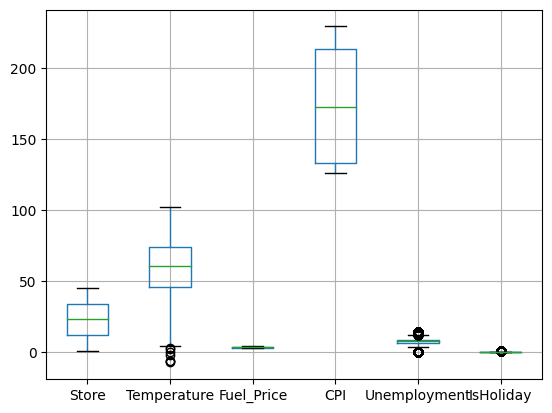

In [ ]:
#check for outliers in features data set

data1.boxplot()

<Axes: >

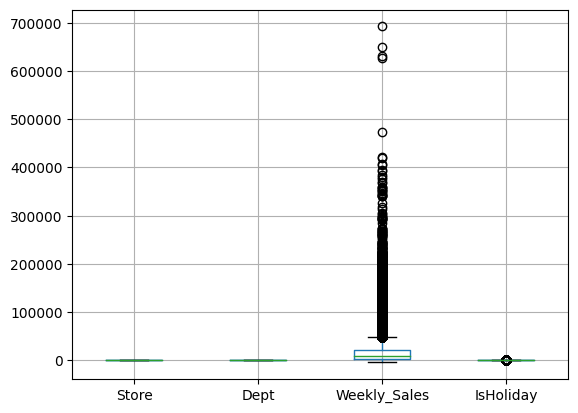

In [ ]:
#check for outliers in sales data set

data2.boxplot()

<Axes: >

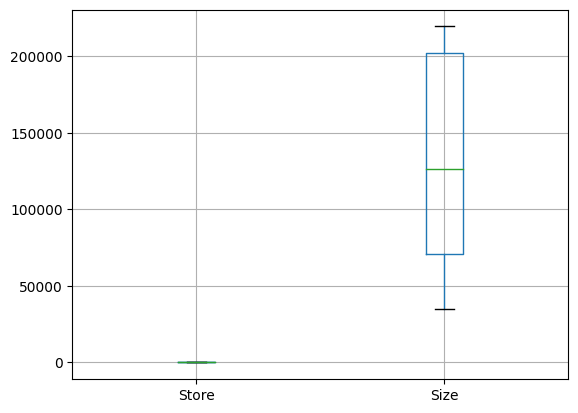

In [ ]:
#check for outliers in stores data set

data3.boxplot()

<ipython-input-25-968e5b047a87>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data2['IsHoliday'])


<Axes: xlabel='IsHoliday', ylabel='Density'>

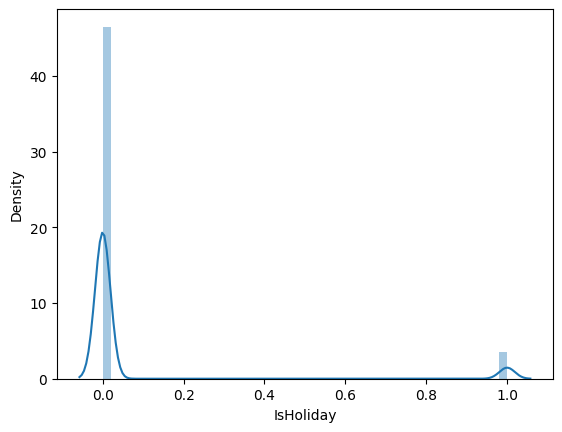

In [ ]:
sns.distplot(data2['IsHoliday'])

## **3. Data Wrangling:**
* **Data Transformation:** Aggregate the data if needed (e.g., daily or monthly sales instead of individual transactions) based on the forecasting granularity required.
* **Normalization/Scaling:** Normalize or scale the numerical features if different features are on different scales.
* **Encoding Categorical Data:** Convert categorical variables into numerical form using techniques like one-hot encoding or label encoding if required.

## **4. Exploratory Data Analysis (EDA):**
* **Statistical Summary:** Generate descriptive statistics (mean, median, standard deviation, etc.) to understand the central tendencies and variability in sales data.
* **Visualizations:** Create visualizations (histograms, line plots, box plots) to explore sales trends over time, identify seasonality, correlations between different features, and variations across stores or product categories.
* **Correlation Analysis:** Use correlation matrices or pair plots to identify relationships between variables (e.g., sales vs. time, sales vs. promotional activities).
* **Forecasting Horizon:** Define the forecasting horizon (e.g., predicting sales for the next month, quarter, or year).